In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
from glob import glob
from pathlib import Path
from fastcore.xtras import load_pickle
import pandas as pd

from gptchem.settings import ONE_COL_GOLDEN_RATIO_HEIGHT_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH, ONE_COL_WIDTH_INCH

from gptchem.plotsettings import *

from scipy.stats import sem

In [41]:
all_res = glob('out/**/*.pkl')

In [42]:
from gptchem.extractor import ClassificationExtractor

In [43]:
compiled_results = []

In [44]:
load_pickle(all_res[0])

{'accuracy': 0.6060606060606061,
 'acc_macro': 0.6060606060606061,
 'racc': 0.5,
 'kappa': 0.21212121212121215,
 'confusion_matrix': pycm.ConfusionMatrix(classes: [0, 1]),
 'f1_macro': 0.6001863932898416,
 'f1_micro': 0.6060606060606061,
 'frac_valid': 1.0,
 'all_y_true': (#66) [1,1,0,0,0,0,1,1,0,1...],
 'all_y_pred': (#66) [0,0,1,0,0,0,1,1,0,1...],
 'valid_indices': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65],
 'might_have_rounded_floats': False,
 'train_size': 20,
 'num_classes': 2,
 'completions': {'choices': [' 0@@',
   ' 0@@',
   ' 1@@',
   ' 0@@',
   ' 0@@',
   ' 0@@',
   ' 1@@',
   ' 1@@',
   ' 0@@',
   ' 1@@',
   ' 0@@',
   ' 0@@',
   ' 1@@',


In [45]:
for res in all_res:
    summary = load_pickle(res)
    if summary['all_y_pred'][0]:
        results = {
            'train_size': summary['train_size'],
            'num_classes': summary['num_classes'],
            'train_size': summary['train_size'],
            'accuracy': summary['accuracy'],
            'representation': summary['representation'],
            'f1_macro': summary['f1_macro'],
            'f1_micro': summary['f1_micro'],
            'kappa': summary['kappa'],
        }

        compiled_results.append(results)

In [46]:
df = pd.DataFrame(compiled_results)

In [56]:
grouped_res = df.groupby(['num_classes', 'representation', 'train_size']).agg(['mean', 'std', sem])

/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _va

In [57]:
grouped_xgboost_res =pd.read_pickle('/Users/kevinmaikjablonka/git/kjappelbaum/gptchem/experiments/03_classification/photoswitch/xgboost_results.pkl')

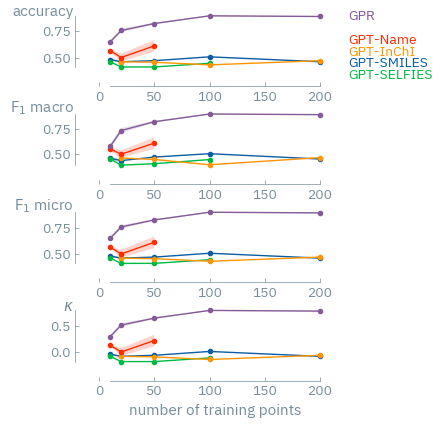

In [58]:
# with plt.style.context(matplotx.styles.dufte):
fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

# plot the binary case, i.e. num_classes = 2

for i, metric in enumerate(["accuracy", "f1_macro", "f1_micro", "kappa"]):
    ax[i].plot(
        grouped_res.loc[2, "SMILES", :].index,
        grouped_res.loc[2, "SMILES", :][metric]["mean"],
        marker="o",
        label="GPT-SMILES",
    )
    ax[i].fill_between(
        grouped_res.loc[2, "SMILES", :].index,
        grouped_res.loc[2, "SMILES", :][metric]["mean"]
        - grouped_res.loc[2, "SMILES", :][metric]["sem"],
        grouped_res.loc[2, "SMILES", :][metric]["mean"]
        + grouped_res.loc[2, "SMILES", :][metric]["sem"],
        alpha=0.2,
    )

    range_frame(
        ax[i],
        grouped_res.loc[2, "SMILES", :].index,
        np.vstack(
            [
                grouped_res.loc[2, "SMILES", :][metric]["mean"].values.reshape(-1,1),
                grouped_res.loc[2, "selfies", :][metric]["mean"].values.reshape(-1,1),
                grouped_res.loc[2, "inchi", :][metric]["mean"].values.reshape(-1,1),
                grouped_res.loc[2, "name", :][metric]["mean"].values.reshape(-1,1),
                grouped_xgboost_res.loc[2, :][metric]["mean"].values.reshape(-1,1),
            ]
        ).flatten(),
    )

    ax[i].plot(
        grouped_res.loc[2, "selfies", :].index,
        grouped_res.loc[2, "selfies", :][metric]["mean"],
        marker="o",
        label="GPT-SELFIES",
    )
    ax[i].fill_between(
        grouped_res.loc[2, "selfies", :].index,
        grouped_res.loc[2, "selfies", :][metric]["mean"]
        - grouped_res.loc[2, "selfies", :][metric]["sem"],
        grouped_res.loc[2, "selfies", :][metric]["mean"]
        + grouped_res.loc[2, "selfies", :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_res.loc[2, "inchi", :].index,
        grouped_res.loc[2, "inchi", :][metric]["mean"],
        marker="o",
        label="GPT-InChI",
    )
    ax[i].fill_between(
        grouped_res.loc[2, "inchi", :].index,
        grouped_res.loc[2, "inchi", :][metric]["mean"]
        - grouped_res.loc[2, "inchi", :][metric]["sem"],
        grouped_res.loc[2, "inchi", :][metric]["mean"]
        + grouped_res.loc[2, "inchi", :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_res.loc[2, "name", :].index,
        grouped_res.loc[2, "name", :][metric]["mean"],
        marker="o",
        label="GPT-Name",
    )
    ax[i].fill_between(
        grouped_res.loc[2, "name", :].index,
        grouped_res.loc[2, "name", :][metric]["mean"]
        - grouped_res.loc[2, "name", :][metric]["sem"],
        grouped_res.loc[2, "name", :][metric]["mean"]
        + grouped_res.loc[2, "name", :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_xgboost_res.loc[2, :].index,
        grouped_xgboost_res.loc[2, :][metric]["mean"],
        marker="o",
        label="GPR",
    )
    ax[i].fill_between(
        grouped_xgboost_res.loc[2, :].index,
        grouped_xgboost_res.loc[2, :][metric]["mean"]
        - grouped_xgboost_res.loc[2, :][metric]["sem"],
        grouped_xgboost_res.loc[2, :][metric]["mean"]
        + grouped_xgboost_res.loc[2, :][metric]["sem"],
        alpha=0.2,
    )



matplotx.line_labels(ax[0])
ylabel_top("accuracy", ax=ax[0], y_pad=0.1, x_pad=0.04)
ylabel_top(r"F$_{1}$ macro", ax=ax[1], y_pad=0.1, x_pad=0.04)
ylabel_top(r"F$_{1}$ micro", ax=ax[2], y_pad=0.1, x_pad=0.04)
ylabel_top(r"$\kappa$", ax=ax[3], y_pad=0.1, x_pad=0.04)
plt.subplots_adjust(hspace=0.6, top=1, bottom=0.2)
ax[-1].set_xlabel("number of training points", labelpad=4)

fig.savefig("photoswitch-classification_results_binary_random.pdf", bbox_inches="tight")

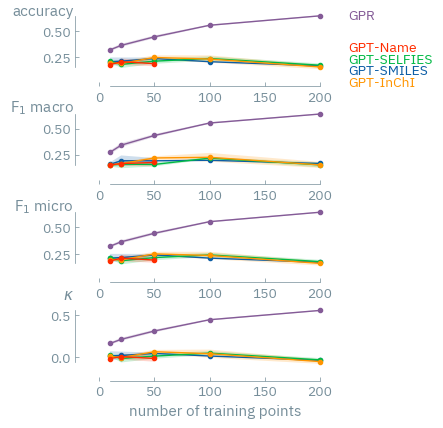

In [59]:

fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

# plot the binary case, i.e. num_classes = 2

for i, metric in enumerate(["accuracy", "f1_macro", "f1_micro", "kappa"]):
    ax[i].plot(
        grouped_res.loc[5, "SMILES", :].index,
        grouped_res.loc[5, "SMILES", :][metric]["mean"],
        marker="o",
        label="GPT-SMILES",
    )
    ax[i].fill_between(
        grouped_res.loc[5, "SMILES", :].index,
        grouped_res.loc[5, "SMILES", :][metric]["mean"]
        - grouped_res.loc[5, "SMILES", :][metric]["sem"],
        grouped_res.loc[5, "SMILES", :][metric]["mean"]
        + grouped_res.loc[5, "SMILES", :][metric]["sem"],
        alpha=0.2,
    )

    range_frame(
        ax[i],
        grouped_res.loc[5, "SMILES", :].index,
        np.vstack(
            [
                grouped_res.loc[5, "SMILES", :][metric]["mean"].values.reshape(-1,1),
                grouped_res.loc[5, "selfies", :][metric]["mean"].values.reshape(-1,1),
                grouped_res.loc[5, "inchi", :][metric]["mean"].values.reshape(-1,1),
                grouped_res.loc[5, "name", :][metric]["mean"].values.reshape(-1,1),
                grouped_xgboost_res.loc[5, :][metric]["mean"].values.reshape(-1,1),
            ]
        ).flatten(),
    )

    ax[i].plot(
        grouped_res.loc[5, "selfies", :].index,
        grouped_res.loc[5, "selfies", :][metric]["mean"],
        marker="o",
        label="GPT-SELFIES",
    )
    ax[i].fill_between(
        grouped_res.loc[5, "selfies", :].index,
        grouped_res.loc[5, "selfies", :][metric]["mean"]
        - grouped_res.loc[5, "selfies", :][metric]["sem"],
        grouped_res.loc[5, "selfies", :][metric]["mean"]
        + grouped_res.loc[5, "selfies", :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_res.loc[5, "inchi", :].index,
        grouped_res.loc[5, "inchi", :][metric]["mean"],
        marker="o",
        label="GPT-InChI",
    )
    ax[i].fill_between(
        grouped_res.loc[5, "inchi", :].index,
        grouped_res.loc[5, "inchi", :][metric]["mean"]
        - grouped_res.loc[5, "inchi", :][metric]["sem"],
        grouped_res.loc[5, "inchi", :][metric]["mean"]
        + grouped_res.loc[5, "inchi", :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_res.loc[5, "name", :].index,
        grouped_res.loc[5, "name", :][metric]["mean"],
        marker="o",
        label="GPT-Name",
    )
    ax[i].fill_between(
        grouped_res.loc[5, "name", :].index,
        grouped_res.loc[5, "name", :][metric]["mean"]
        - grouped_res.loc[5, "name", :][metric]["sem"],
        grouped_res.loc[5, "name", :][metric]["mean"]
        + grouped_res.loc[5, "name", :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_xgboost_res.loc[5, :].index,
        grouped_xgboost_res.loc[5, :][metric]["mean"],
        marker="o",
        label="GPR",
    )
    ax[i].fill_between(
        grouped_xgboost_res.loc[5, :].index,
        grouped_xgboost_res.loc[5, :][metric]["mean"]
        - grouped_xgboost_res.loc[5, :][metric]["sem"],
        grouped_xgboost_res.loc[5, :][metric]["mean"]
        + grouped_xgboost_res.loc[5, :][metric]["sem"],
        alpha=0.2,
    )



matplotx.line_labels(ax[0])
ylabel_top("accuracy", ax=ax[0], y_pad=0.1, x_pad=0.04)
ylabel_top(r"F$_{1}$ macro", ax=ax[1], y_pad=0.1, x_pad=0.04)
ylabel_top(r"F$_{1}$ micro", ax=ax[2], y_pad=0.1, x_pad=0.04)
ylabel_top(r"$\kappa$", ax=ax[3], y_pad=0.1, x_pad=0.04)
plt.subplots_adjust(hspace=0.6, top=1, bottom=0.2)
ax[-1].set_xlabel("number of training points", labelpad=4)

fig.savefig("photoswitch-classification_results_5_class_random.pdf", bbox_inches="tight")